Code to import and clean the Criteo uplift data.

Download the data here: https://drive.google.com/file/d/1PQSUWEyu7RJMkh2vVWi8uHWTKGWIunpV/view

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("../../Data/Criteo/criteo-research-uplift-v2.1.csv.gz", 
                 compression='gzip', 
                 sep='\,',
                 header=0,
                 engine='python')

print(df.head())

          f0         f1        f2        f3         f4        f5        f6        f7        f8         f9       f10       f11  treatment  conversion  visit  exposure
0  12.616365  10.059654  8.976429  4.679882  10.280525  4.115453  0.294443  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0      0         0
1  12.616365  10.059654  9.002689  4.679882  10.280525  4.115453  0.294443  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0      0         0
2  12.616365  10.059654  8.964775  4.679882  10.280525  4.115453  0.294443  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0      0         0
3  12.616365  10.059654  9.002801  4.679882  10.280525  4.115453  0.294443  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0      0         0
4  12.616365  10.059654  9.037999  4.679882  10.280525  4.115453  0.294443  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0      0         0


View some of the data.

In [2]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,26.297764,10.059654,9.006250,4.679882,10.280525,4.115453,-3.282109,4.833815,3.839578,13.190056,5.300375,-0.168679,1,0,0,0
13979588,12.642207,10.679513,8.214383,-1.700105,10.280525,3.013064,-13.955150,6.269026,3.971858,13.190056,5.300375,-0.168679,1,0,0,1
13979589,12.976557,10.059654,8.381868,0.842442,11.029584,4.115453,-8.281971,4.833815,3.779212,23.570168,6.169187,-0.168679,1,0,1,0
13979590,24.805064,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


Some summary statistics.

In [3]:
# calculate summary statistics for the dataset
print(df.describe())


                 f0            f1            f2            f3            f4            f5  ...           f10           f11     treatment    conversion         visit      exposure
count  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07  ...  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07  1.397959e+07
mean   1.962030e+01  1.006998e+01  8.446582e+00  4.178923e+00  1.033884e+01  4.028513e+00  ...  5.333396e+00 -1.709672e-01  8.500001e-01  2.916680e-03  4.699200e-02  3.063122e-02
std    5.377464e+00  1.047557e-01  2.993161e-01  1.336645e+00  3.433081e-01  4.310974e-01  ...  1.682288e-01  2.283277e-02  3.570713e-01  5.392748e-02  2.116217e-01  1.723164e-01
min    1.261636e+01  1.005965e+01  8.214383e+00 -8.398387e+00  1.028053e+01 -9.011892e+00  ...  5.300375e+00 -1.383941e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    1.261636e+01  1.005965e+01  8.214383e+00  4.679882e+00  1.028053e+01  4.115453e+00  ...  5.300375e

Are there any missing values?

In [4]:
# count the number of missing values in each column
print(df.isnull().sum())


f0            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
treatment     0
conversion    0
visit         0
exposure      0
dtype: int64


The data seems pretty clean already. We also don't know what the features f0-f11 are, so we don't know if there are any unrealistic values to exclude. We'll assume the values are all correct.

Let's see how many unique values each feature has. This will help us decide what model to use for synthesizing each feature.

In [5]:
# compute number of unique values for each feature
print(df.nunique())

f0            2181959
f1                 60
f2            2051900
f3                552
f4                260
f5                132
f6               1645
f7             622143
f8               3743
f9               1594
f10            517372
f11               136
treatment           2
conversion          2
visit               2
exposure            2
dtype: int64


Features f0-f11 are numeric features, treatment is a binary variable, conversion is a binary variable, visit is a binary variable, and exposure is a binary variable.

Create kernel density plots for features f0-f11.

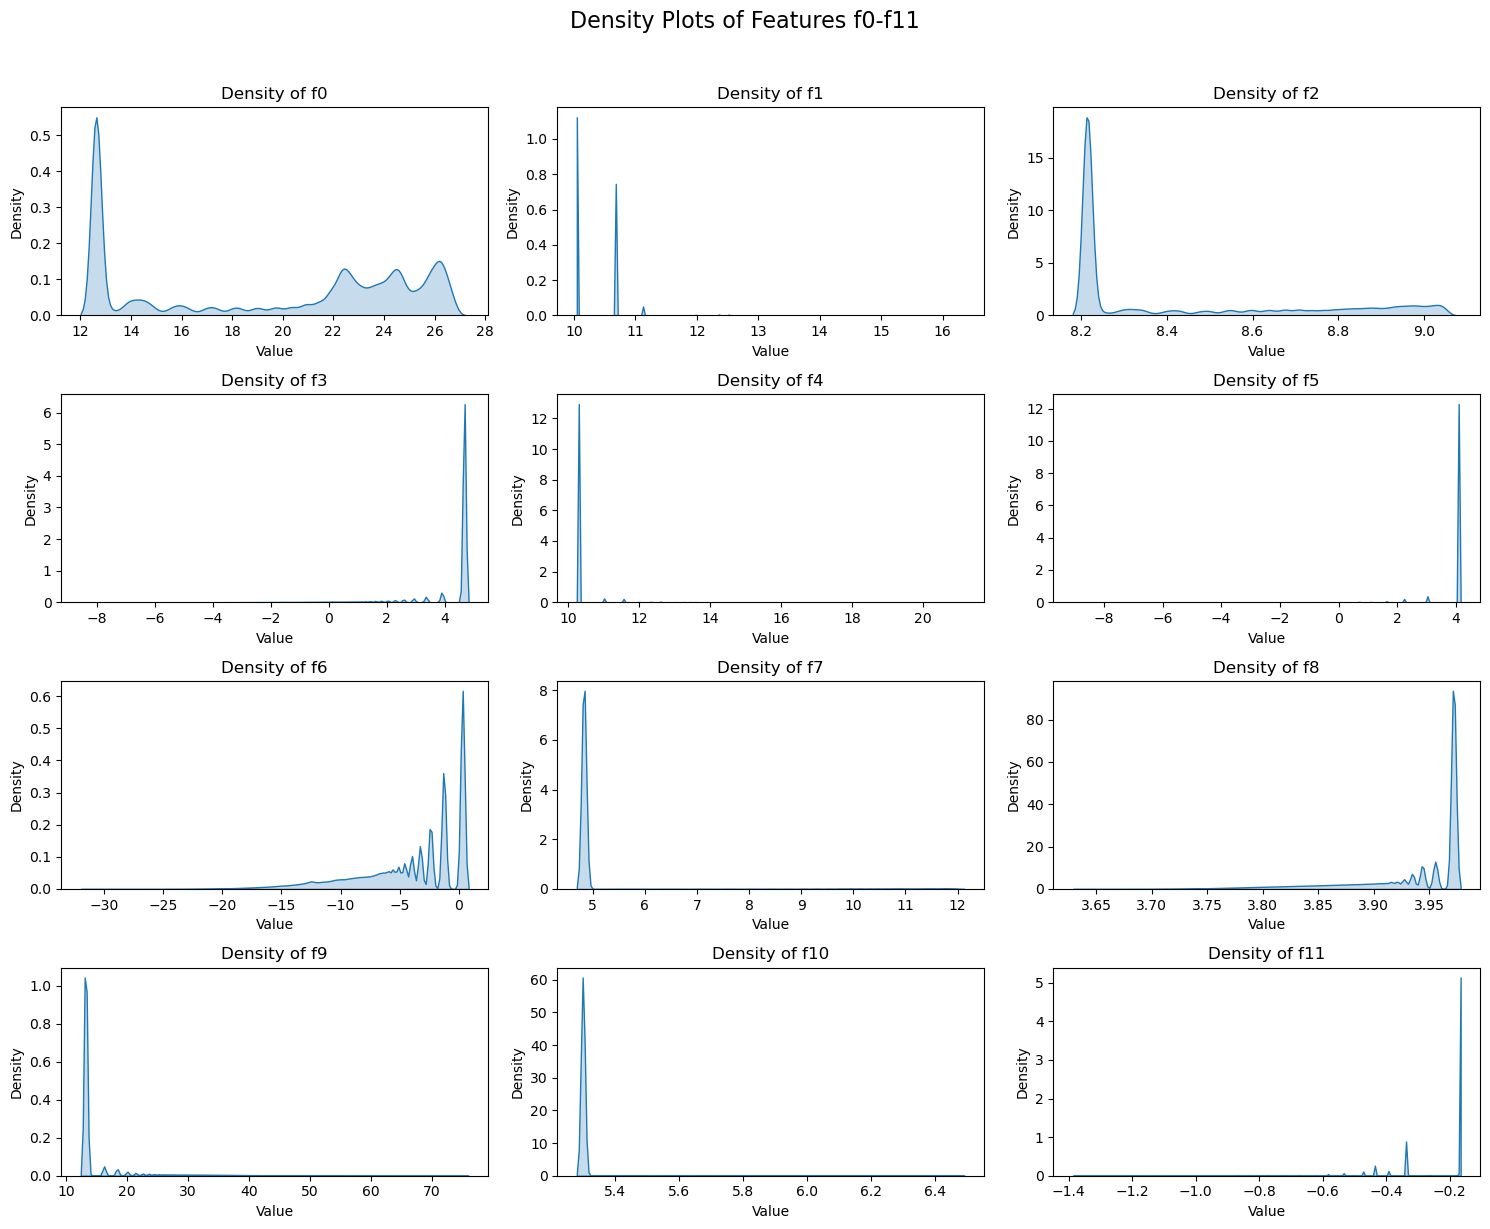

In [6]:
# create density plots of variables f0-f11

plot_data = df[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']]

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Density Plots of Features f0-f11', fontsize=16, y=1.02)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature's density
for ax, (feature, values) in zip(axes, plot_data.items()):
    sns.kdeplot(data=values, ax=ax, fill=True)
    ax.set_title(f'Density of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
# plt.savefig('density_plots.png', dpi=300)
plt.show()

All of these features are multimodal, and some are heavily skewed.

- Right skewed: f0, f1, f2, f4, f7, f9, f10
- Left skewed: f3, f5, f6, f8, f11

We'll use a Yeo-Johnson transformation during the synthesis process to make the distribution of each variable more normal. This transformation is able to handle negative and zero values.

In [7]:
# def correct_skew(df, right_skewed_features, left_skewed_features):
#     """
#     Apply log and exponential transformations to correct skewness in specified features.
    
#     Parameters:
#     -----------
#     df : pandas DataFrame
#         The input dataframe containing the features to be transformed
#     right_skewed_features : list of str
#         List of feature names that are right-skewed
#     left_skewed_features : list of str
#         List of feature names that are left-skewed
    
#     Returns:
#     --------
#     pd.DataFrame
#         DataFrame with transformed features
#     """
#     df_transformed = df.copy()
    
#     # Handle right-skewed features with log transformation
#     for feature in right_skewed_features:
#         if feature not in df.columns:
#             print(f"Warning: Feature '{feature}' not found in dataframe")
#             continue
            
#         # Add small constant to handle zeros/negatives
#         min_val = df[feature].min()
#         if min_val <= 0:
#             df_transformed[feature] = df[feature] + (1 - min_val)
        
#         # Apply log transformation
#         df_transformed[feature] = np.log(df_transformed[feature])
    
#     # Handle left-skewed features with exponential transformation
#     for feature in left_skewed_features:
#         if feature not in df.columns:
#             print(f"Warning: Feature '{feature}' not found in dataframe")
#             continue
            
#         # Apply exponential transformation directly
#         df_transformed[feature] = np.exp(df[feature])
    
#     return df_transformed

In [8]:
# df_transformed = correct_skew(df,
#                               right_skewed_features=['f0', 'f1', 'f2', 'f4', 'f7', 'f9', 'f10'], 
#                               left_skewed_features=['f3', 'f5', 'f6', 'f8', 'f11'])

In [9]:
# # create density plots of transformed variables f0-f11

# plot_data = df_transformed[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']]

# # Create a 4x3 grid of subplots
# fig, axes = plt.subplots(4, 3, figsize=(15, 12))
# fig.suptitle('Density Plots of Features f0-f11', fontsize=16, y=1.02)

# # Flatten the axes array for easier iteration
# axes = axes.flatten()

# # Plot each feature's density
# for ax, (feature, values) in zip(axes, plot_data.items()):
#     sns.kdeplot(data=values, ax=ax, fill=True)
#     ax.set_title(f'Density of {feature}')
#     ax.set_xlabel('Value')
#     ax.set_ylabel('Density')

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Save the plot
# # plt.savefig('density_plots.png', dpi=300)
# plt.show()

Save a small version of the data for testing.

In [10]:
df_small, _ = train_test_split(df, train_size = 100000, stratify = df['conversion'])

We need a version of the data with a higher proportion of observations with a positive conversion to ensure that our user model (logistic regression) can be trained on small sets of the data for the privacy simulation.

In [11]:
# counts of each value of conversion
conversion_counts = np.unique(df.conversion, return_counts=True)[1]
conversion_counts

array([13938818,    40774])

In [12]:
# proportion of each value of conversion
conversion_counts/np.sum(conversion_counts)

array([0.99708332, 0.00291668])

Let's "oversample" a version of the data so that we have a higher proportion of conversion = 1.

In [13]:
zero_conversion = df.loc[df.conversion == 0,:]
one_conversion = df.loc[df.conversion == 1,:]

We'll create a set with 10% of the observations with conversion = 1.

In [14]:
# number of samples with conversion = 0 to have 10% with conversion = 1
num_zero_samples = one_conversion.shape[0]*10

In [15]:
# sample from the zero_conversion data
zero_conversion, _ = train_test_split(zero_conversion, train_size = num_zero_samples)

In [16]:
zero_conversion

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
10835466,19.609851,10.059654,8.214383,3.359763,10.280525,4.115453,-4.595460,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
10577673,26.681893,10.059654,8.365028,4.679882,10.280525,4.115453,-1.288207,4.833815,3.822599,29.642144,5.300375,-0.168679,1,0,1,0
13770186,12.616365,10.059654,8.884354,4.679882,10.280525,4.115453,0.294443,4.833815,3.943716,13.190056,5.300375,-0.168679,1,0,0,0
13487477,17.885354,10.059654,8.533054,-0.205137,10.280525,4.115453,-12.422866,4.833815,3.827510,23.570168,5.300375,-0.168679,1,0,0,0
4031315,17.589325,10.059654,8.214383,2.934780,10.280525,4.115453,-3.282109,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605232,25.907866,10.059654,8.214383,4.679882,10.280525,4.115453,-8.493011,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
7341300,12.616365,10.059654,8.950449,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
7841373,12.616365,10.059654,8.995356,4.679882,10.280525,4.115453,0.294443,4.833815,3.920995,13.190056,5.300375,-0.168679,1,0,0,0
6712518,12.616365,10.059654,9.025575,4.679882,10.280525,4.115453,0.294443,4.833815,3.934656,13.190056,5.300375,-0.168679,0,0,0,0


In [17]:
# combine observations with positive and negative conversion
df_os = pd.concat([zero_conversion, one_conversion], axis = 0)

In [18]:
df_os

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
10835466,19.609851,10.059654,8.214383,3.359763,10.280525,4.115453,-4.595460,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
10577673,26.681893,10.059654,8.365028,4.679882,10.280525,4.115453,-1.288207,4.833815,3.822599,29.642144,5.300375,-0.168679,1,0,1,0
13770186,12.616365,10.059654,8.884354,4.679882,10.280525,4.115453,0.294443,4.833815,3.943716,13.190056,5.300375,-0.168679,1,0,0,0
13487477,17.885354,10.059654,8.533054,-0.205137,10.280525,4.115453,-12.422866,4.833815,3.827510,23.570168,5.300375,-0.168679,1,0,0,0
4031315,17.589325,10.059654,8.214383,2.934780,10.280525,4.115453,-3.282109,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13978559,13.680284,10.059654,8.325934,-0.600592,11.029584,1.128518,-13.045950,10.885556,3.758296,44.784329,5.844038,-0.267350,1,1,1,1
13978684,14.251906,13.579750,8.303577,-2.272900,12.594889,-4.636110,-19.328059,5.621479,3.755250,42.018683,6.141586,-0.168679,1,1,1,1
13978812,20.711370,10.059654,8.290111,4.679882,10.280525,4.115453,-6.359690,4.833815,3.813849,26.606156,5.300375,-0.168679,1,1,1,1
13978881,23.767207,10.059654,8.283185,4.679882,10.280525,4.115453,-3.282109,4.833815,3.767224,46.714867,5.300375,-0.168679,1,1,1,0


In [20]:
# save the oversampled version
df_os.to_csv("../../Data/Criteo/cleaned_criteo_os.gz", index=False, compression="gzip")
# save the small version
df_small.to_csv("../../Data/Criteo/cleaned_criteo_small.gz", index=False, compression="gzip")
# save the full version
df.to_csv("../../Data/Criteo/cleaned_criteo.gz", index=False, compression="gzip")